In [186]:
import pandas as pd
import numpy as np
import awpy as Demoparser
import matplotlib.pyplot as plt
import json
import os
import scipy.stats as st
import seaborn as sns
import math

In [35]:
games = []
for jsn in os.listdir("C:/Users/Wessel/Documents/DataScienceDemos/JSON"):
    game = json.load(open("C:/Users/Wessel/Documents\DataScienceDemos/JSON/{}".format(jsn)))
    games.append(game)   

In [56]:
#generate list of unique maps in pool
maps = []
for game in games:
    if game['mapName'] not in maps:
        maps.append(game['mapName'])
print(maps)

['de_mirage', 'de_inferno', 'de_overpass', 'de_ancient', 'de_nuke', 'de_vertigo']


In [383]:
#init dict's of maps
map_dict_mouz = {}
map_dict_enemy = {}
avg_kills_mouz = {}
avg_kills_enemy = {}
win_dict = {}
loss_dict = {}
i=0
for k in maps:
    map_dict_mouz[maps[i]] = []
    map_dict_enemy[maps[i]] = []
    avg_kills_mouz[maps[i]] = []
    avg_kills_enemy[maps[i]] = []
    win_dict[maps[i]] = 0
    loss_dict[maps[i]] = 0
    i += 1

In [384]:
#fill dict's wits mous kills per round
for game in games:
    i = 0
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for kill in gameround['kills']:
            if kill['attackerTeam'] == "MOUZ":
                number_of_kills += 1
            j += 1  
        map_dict_mouz[game['mapName']].append(number_of_kills) 
        i += 1

#fill dict's with enemy klls per round
for game in games:
    i = 0
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for kill in gameround['kills']:
            if kill['attackerTeam'] != "MOUZ":
                number_of_kills += 1
            j += 1  
        map_dict_enemy[game['mapName']].append(number_of_kills) 
        i += 1

In [248]:
#calculate bin for histplot
bin_dict = {}
i=0
for k in maps:
    bin_dict[maps[i]] = 0
    i += 1
for mp in map_dict_mouz:
    q3, q1 = np.percentile(map_dict_mouz.get(mp), [75 ,25])
    iqr = q3 - q1
    n = len(map_dict_mouz.get(mp))
    bin_width = (2*iqr)/pow(n, 1/3)
    bin_dict[mp] += int(bin_width)

bin_dict

{'de_mirage': 1,
 'de_inferno': 1,
 'de_overpass': 1,
 'de_ancient': 1,
 'de_nuke': 2,
 'de_vertigo': 2}

In [385]:
i=0
for mp in map_dict_mouz:
    avg_kills_mouz[maps[i]] = (sum(map_dict_mouz[mp])/len(map_dict_mouz[mp]))
    i += 1
i=0
for mp in map_dict_enemy:
    avg_kills_enemy[maps[i]] = (sum(map_dict_enemy[mp])/len(map_dict_enemy[mp]))
    i += 1

print(avg_kills_mouz)
print(avg_kills_enemy)

{'de_mirage': 3.1454545454545455, 'de_inferno': 2.9432624113475176, 'de_overpass': 3.023529411764706, 'de_ancient': 3.4536082474226806, 'de_nuke': 2.9583333333333335, 'de_vertigo': 3.75}
{'de_mirage': 3.118181818181818, 'de_inferno': 3.120567375886525, 'de_overpass': 3.364705882352941, 'de_ancient': 3.0, 'de_nuke': 3.5833333333333335, 'de_vertigo': 3.125}


<Axes: >

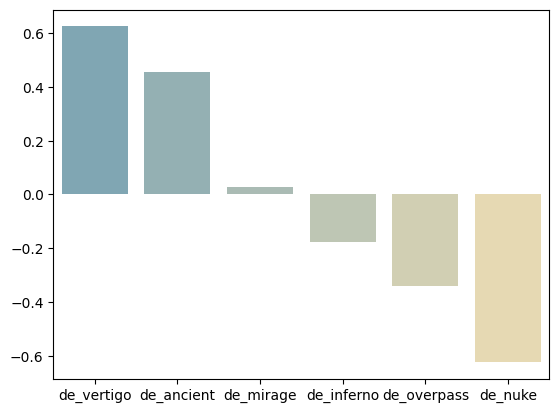

In [380]:
kill_dif = {}
i = 0
for k in avg_kills_mouz:
    kill_dif[maps[i]] = avg_kills_mouz[k]-avg_kills_enemy[k]
    i += 1

kill_dif = dict(sorted(kill_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(kill_dif.keys())
values = list(kill_dif.values())
sns.barplot(x=keys, y=values, palette="blend:#7AB,#EDA")


In [386]:
#fill dict's wits mous kills per round
for game in games:
    i = 0
    for gameround in game['gameRounds']:         
        if(gameround['winningTeam'] == "MOUZ"):
            win_dict[game['mapName']] += 1
        else:
            loss_dict[game['mapName']] += 1
        i += 1
print(win_dict)
print(loss_dict)

{'de_mirage': 58, 'de_inferno': 69, 'de_overpass': 42, 'de_ancient': 58, 'de_nuke': 8, 'de_vertigo': 16}
{'de_mirage': 52, 'de_inferno': 72, 'de_overpass': 43, 'de_ancient': 39, 'de_nuke': 16, 'de_vertigo': 8}


<Axes: >

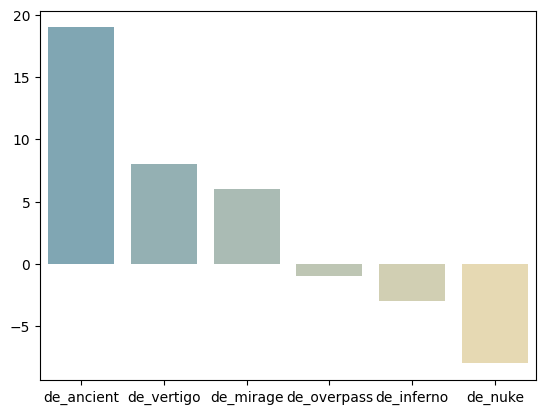

In [387]:
win_dif = {}
i = 0
for k in win_dict:
    win_dif[maps[i]] = win_dict[k]-loss_dict[k]
    i += 1

win_dif = dict(sorted(win_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(win_dif.keys())
values = list(win_dif.values())
sns.barplot(x=keys, y=values, palette="blend:#7AB,#EDA")